In [1]:
# Carga inicial de librerías
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Limpieza datos incidencia acumulada

In [2]:
#Carga de ficheros de datos
datos_covid = pd.read_csv('../data/inicial/datos_covid/cv19_ia.csv', header=0)

In [3]:
#Obtenemos las dimensiones del dataframe
shape = datos_covid.shape

print("Número de atributos:", shape[1])
print("Número de filas :", shape[0])
print("Nombre de los atributos:", datos_covid.columns.values)

Número de atributos: 6
Número de filas : 3624
Nombre de los atributos: ['fecha_datos' 'isla' 'fecha' 'numero_casos' 'ia_7dias' 'ia_14dias']


In [4]:
#Buscamos los valores vacíos
print("\nValores no definidos:")
print(datos_covid.isna().sum())

print("\nValores nulos:")
print(datos_covid.isnull().sum())


Valores no definidos:
fecha_datos     0
isla            0
fecha           0
numero_casos    0
ia_7dias        0
ia_14dias       0
dtype: int64

Valores nulos:
fecha_datos     0
isla            0
fecha           0
numero_casos    0
ia_7dias        0
ia_14dias       0
dtype: int64


In [5]:
datos_covid.info()
datos_covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   fecha_datos   3624 non-null   object
 1   isla          3624 non-null   object
 2   fecha         3624 non-null   object
 3   numero_casos  3624 non-null   int64 
 4   ia_7dias      3624 non-null   object
 5   ia_14dias     3624 non-null   object
dtypes: int64(1), object(5)
memory usage: 170.0+ KB


fecha_datos           isla       fecha  numero_casos           ia_7dias  \
0  29/03/2022      LANZAROTE  01/01/2021            14  48,13493184093652   
1  29/03/2022  FUERTEVENTURA  01/01/2021             1  25,89115691711489   
2  29/03/2022      EL HIERRO  01/01/2021             0  80,73921234412846   
3  29/03/2022      LA GOMERA  01/01/2021             0  46,12971676353907   
4  29/03/2022   GRAN CANARIA  01/01/2021            62  49,09289193368719   

            ia_14dias  
0    77,6576900367109  
1   49,27671800354124  
2  107,65228312550462  
3  156,84103699603284  
4   83,57480412520557

In [6]:
datos_covid = datos_covid.drop(columns=['fecha_datos'])

datos_covid['fecha'] = pd.to_datetime(datos_covid['fecha'], dayfirst=True)
datos_covid['isla'] = datos_covid['isla'].astype(str)
datos_covid['ia_7dias'] = datos_covid['ia_7dias'].str.replace(',','.').astype(float)
datos_covid['ia_14dias'] = datos_covid['ia_14dias'].str.replace(',','.').astype(float)

In [7]:
datos_covid.info()
datos_covid.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3624 entries, 0 to 3623
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   isla          3624 non-null   object        
 1   fecha         3624 non-null   datetime64[ns]
 2   numero_casos  3624 non-null   int64         
 3   ia_7dias      3624 non-null   float64       
 4   ia_14dias     3624 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 141.7+ KB


isla      fecha  numero_casos   ia_7dias   ia_14dias
0      LANZAROTE 2021-01-01            14  48.134932   77.657690
1  FUERTEVENTURA 2021-01-01             1  25.891157   49.276718
2      EL HIERRO 2021-01-01             0  80.739212  107.652283
3      LA GOMERA 2021-01-01             0  46.129717  156.841037
4   GRAN CANARIA 2021-01-01            62  49.092892   83.574804

In [8]:
valores_islas = datos_covid['isla'].unique()
print("Valores de islas:", valores_islas)

Valores de islas: ['LANZAROTE' 'FUERTEVENTURA' 'EL HIERRO' 'LA GOMERA' 'GRAN CANARIA'
 'LA PALMA' 'TENERIFE' 'CANARIAS']


In [9]:
datos_covid = datos_covid[datos_covid['isla'] != 'CANARIAS']
valores_islas = valores_islas[:-1]

In [10]:
fecha_inicio = datos_covid['fecha'].min()
fecha_fin = datos_covid['fecha'].max()
rango_fechas = pd.date_range(start=fecha_inicio, end=fecha_fin, freq='D')

In [95]:
def comprobar_fechas_isla(df):
    fechas_faltantes = rango_fechas[~rango_fechas.isin(df['fecha'])]
    if len(fechas_faltantes) == 0:
        return 'fechas completas'
    else:
        # Convertir las fechas a strings
        fechas_str = [str(fecha) for fecha in fechas_faltantes]
        fechas_str = ','.join(fechas_str)
        
        return fechas_str

In [96]:
def comprobar_fechas(df):
    for isla in valores_islas:
        print('Fechas faltantes para ' + isla + ': ' + comprobar_fechas_isla(df[df['isla'] == isla]))

In [13]:
comprobar_fechas(datos_covid)

Fechas faltantes para LANZAROTE: fechas completas
Fechas faltantes para FUERTEVENTURA: fechas completas
Fechas faltantes para EL HIERRO: fechas completas
Fechas faltantes para LA GOMERA: fechas completas
Fechas faltantes para GRAN CANARIA: fechas completas
Fechas faltantes para LA PALMA: fechas completas
Fechas faltantes para TENERIFE: fechas completas


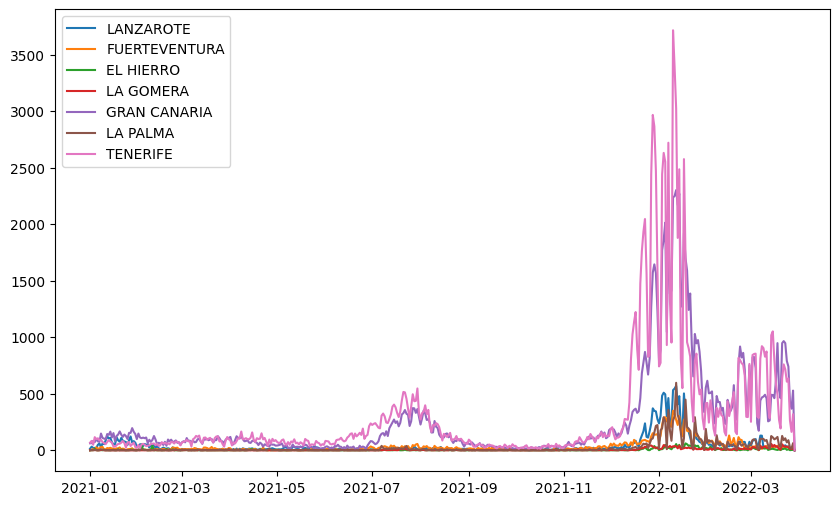

In [14]:
# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Iterar sobre las columnas de datos y trazar cada serie temporal
for isla in valores_islas:
    datos_isla = datos_covid[datos_covid['isla'] == isla] 
    plt.plot(datos_isla['fecha'], datos_isla['numero_casos'], label=isla)


plt.legend()
plt.show()

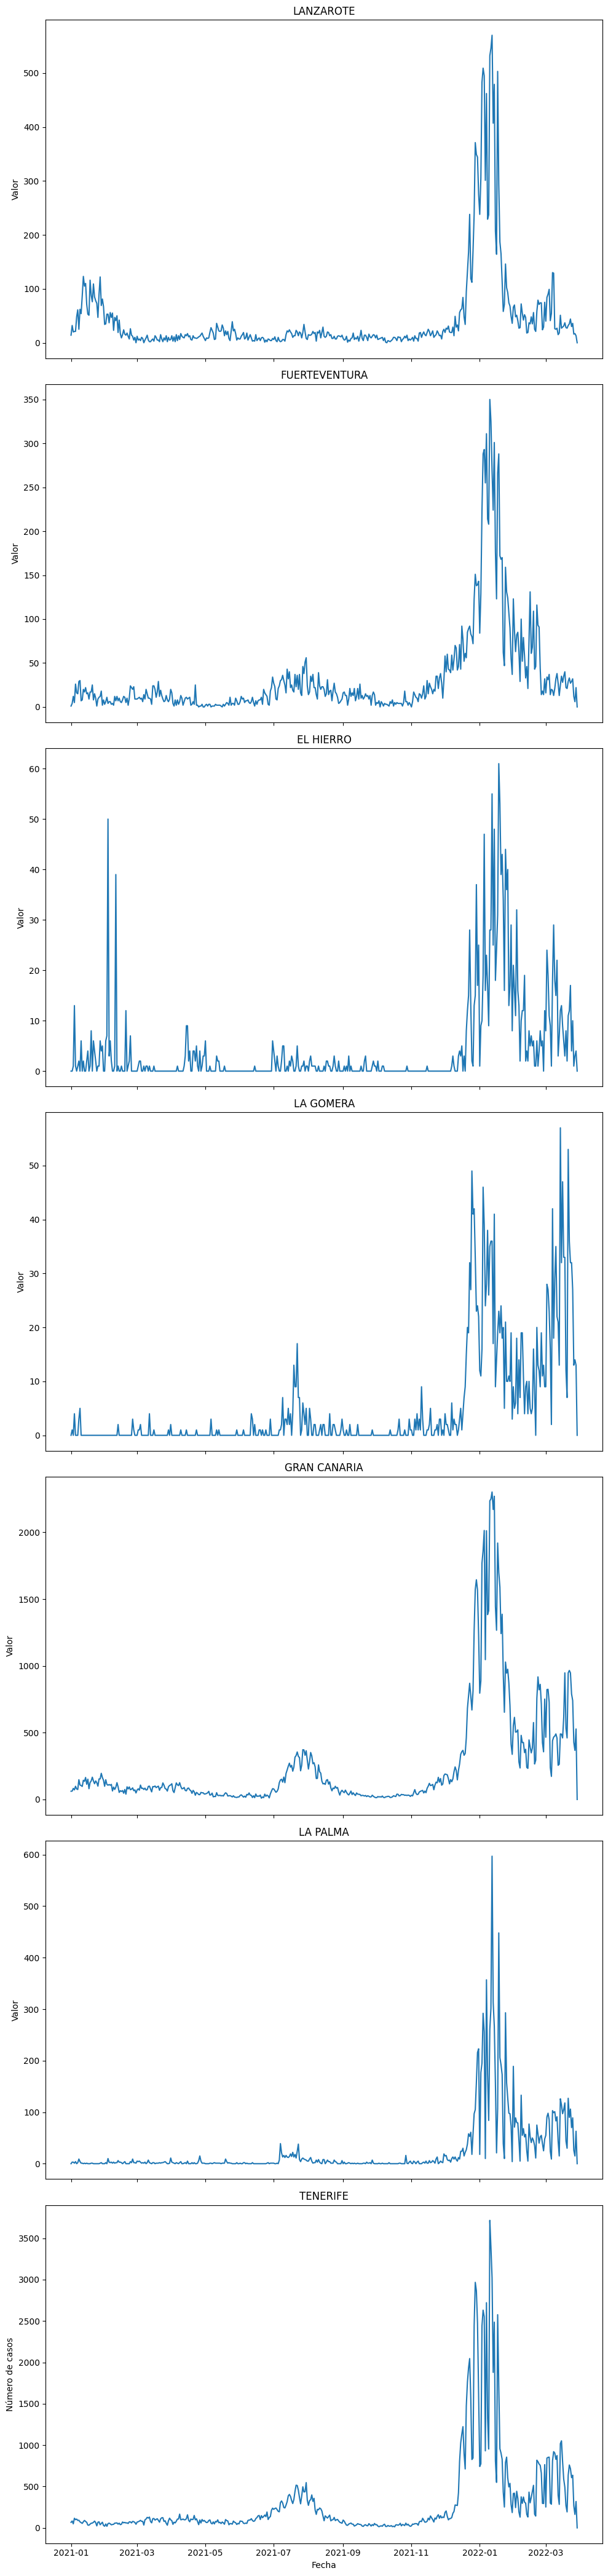

In [15]:

# Configurar el tamaño de la figura y el número de subgráficos
num_subplots = len(valores_islas)
fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 6*num_subplots), sharex=True)

# Iterar sobre las islas y trazar la serie temporal correspondiente para cada una en un subgráfico diferente
for i, isla in enumerate(valores_islas):
    datos_isla = datos_covid[datos_covid['isla'] == isla] 
    axes[i].plot(datos_isla['fecha'], datos_isla['numero_casos'])  # Trazar la serie temporal para la isla actual en el subgráfico correspondiente
    axes[i].set_title(isla)  # Establecer el título del subgráfico como el nombre de la isla
    axes[i].set_ylabel('Valor')  # Establecer la etiqueta del eje y

# Añadir etiqueta del eje x al último subgráfico
axes[-1].set_xlabel('Fecha')
axes[-1].set_ylabel('Número de casos')

# Ajustar el diseño de los subgráficos para evitar superposiciones
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Limpieza datos PCRs

In [16]:
#Carga de ficheros de datos
datos_pcrs = pd.read_csv('../data/inicial/datos_covid/cv19_pcr_porcentaje.csv', header=0)

In [17]:
#Obtenemos las dimensiones del dataframe
shape = datos_pcrs.shape

print("Número de atributos:", shape[1])
print("Número de filas :", shape[0])
print("Nombre de los atributos:", datos_pcrs.columns.values)

Número de atributos: 7
Número de filas : 3616
Nombre de los atributos: ['fecha_datos' 'isla' 'fecha' 'pcr_total' 'pcr_positivos'
 'pcr_porcentaje_positivos' 'pcr_porcentaje_positivos_7dias']


In [18]:
#Buscamos los valores vacíos
print("\nValores no definidos:")
print(datos_pcrs.isna().sum())

print("\nValores nulos:")
print(datos_pcrs.isnull().sum())


Valores no definidos:
fecha_datos                       0
isla                              0
fecha                             0
pcr_total                         0
pcr_positivos                     0
pcr_porcentaje_positivos          0
pcr_porcentaje_positivos_7dias    0
dtype: int64

Valores nulos:
fecha_datos                       0
isla                              0
fecha                             0
pcr_total                         0
pcr_positivos                     0
pcr_porcentaje_positivos          0
pcr_porcentaje_positivos_7dias    0
dtype: int64


In [19]:
datos_pcrs.info()
datos_pcrs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   fecha_datos                     3616 non-null   object
 1   isla                            3616 non-null   object
 2   fecha                           3616 non-null   object
 3   pcr_total                       3616 non-null   int64 
 4   pcr_positivos                   3616 non-null   int64 
 5   pcr_porcentaje_positivos        3616 non-null   object
 6   pcr_porcentaje_positivos_7dias  3616 non-null   object
dtypes: int64(2), object(5)
memory usage: 197.9+ KB


fecha_datos       isla       fecha  pcr_total  pcr_positivos  \
0  29/03/2022  EL HIERRO  01/01/2021          1              0   
1  29/03/2022  EL HIERRO  02/01/2021         39              0   
2  29/03/2022  EL HIERRO  03/01/2021          8              1   
3  29/03/2022  EL HIERRO  04/01/2021         39             16   
4  29/03/2022  EL HIERRO  05/01/2021         20              5   

  pcr_porcentaje_positivos pcr_porcentaje_positivos_7dias  
0                        0              4,529616724738676  
1                        0              4,529616724738676  
2                     12,5              3,833865814696486  
3        41,02564102564103              4,088050314465409  
4                       25                              8

In [20]:
datos_pcrs = datos_pcrs.drop(columns=['fecha_datos'])

datos_pcrs['fecha'] = pd.to_datetime(datos_pcrs['fecha'], dayfirst=True)
datos_pcrs['isla'] = datos_pcrs['isla'].astype(str)
datos_pcrs['pcr_total'] = datos_pcrs['pcr_total'].astype(int)
datos_pcrs['pcr_positivos'] = datos_pcrs['pcr_positivos'].astype(int)
datos_pcrs['pcr_porcentaje_positivos'] = datos_pcrs['pcr_porcentaje_positivos'].str.replace(',','.').astype(float)
datos_pcrs['pcr_porcentaje_positivos_7dias'] = datos_pcrs['pcr_porcentaje_positivos_7dias'].str.replace(',','.').astype(float)

In [21]:
datos_pcrs.info()
datos_pcrs.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   isla                            3616 non-null   object        
 1   fecha                           3616 non-null   datetime64[ns]
 2   pcr_total                       3616 non-null   int32         
 3   pcr_positivos                   3616 non-null   int32         
 4   pcr_porcentaje_positivos        3616 non-null   float64       
 5   pcr_porcentaje_positivos_7dias  3616 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(2), object(1)
memory usage: 141.4+ KB


isla      fecha  pcr_total  pcr_positivos  pcr_porcentaje_positivos  \
0  EL HIERRO 2021-01-01          1              0                  0.000000   
1  EL HIERRO 2021-01-02         39              0                  0.000000   
2  EL HIERRO 2021-01-03          8              1                 12.500000   
3  EL HIERRO 2021-01-04         39             16                 41.025641   
4  EL HIERRO 2021-01-05         20              5                 25.000000   

   pcr_porcentaje_positivos_7dias  
0                        4.529617  
1                        4.529617  
2                        3.833866  
3                        4.088050  
4                        8.000000

In [22]:
valores_islas_pcr = datos_pcrs['isla'].unique()
print("Valores de islas:", valores_islas_pcr)

Valores de islas: ['EL HIERRO' 'LA PALMA' 'LA GOMERA' 'TENERIFE' 'GRAN CANARIA'
 'FUERTEVENTURA' 'LANZAROTE' 'CANARIAS']


In [23]:
datos_pcrs = datos_pcrs[datos_pcrs['isla'] != 'CANARIAS']
valores_islas_pcr = valores_islas_pcr[:-1]

In [24]:
comprobar_fechas(datos_pcrs)

Fechas faltantes para LANZAROTE: 2022-03-29 00:00:00
Fechas faltantes para FUERTEVENTURA: 2022-03-29 00:00:00
Fechas faltantes para EL HIERRO: 2022-03-29 00:00:00
Fechas faltantes para LA GOMERA: 2022-03-29 00:00:00
Fechas faltantes para GRAN CANARIA: 2022-03-29 00:00:00
Fechas faltantes para LA PALMA: 2022-03-29 00:00:00
Fechas faltantes para TENERIFE: 2022-03-29 00:00:00


In [57]:
# Para poder hacer la fusión debemos de pasar los datos a tipo string
datos_covid['fecha'] = datos_covid['fecha'].astype(str)
datos_pcrs['fecha'] = datos_pcrs['fecha'].astype(str)

In [62]:
df_covid_final = pd.merge(datos_covid, datos_pcrs, on=['fecha', 'isla'], how='inner')

In [63]:
df_covid_final['fecha'] = pd.to_datetime(df_covid_final['fecha'])

In [64]:
df_covid_final

isla      fecha  numero_casos    ia_7dias    ia_14dias  \
0         LANZAROTE 2021-01-01            14   48.134932    77.657690   
1     FUERTEVENTURA 2021-01-01             1   25.891157    49.276718   
2         EL HIERRO 2021-01-01             0   80.739212   107.652283   
3         LA GOMERA 2021-01-01             0   46.129717   156.841037   
4      GRAN CANARIA 2021-01-01            62   49.092892    83.574804   
...             ...        ...           ...         ...          ...   
3159      LANZAROTE 2022-03-28            13  134.777809   282.391600   
3160      LA GOMERA 2022-03-28            13  954.885137  1974.351877   
3161       LA PALMA 2022-03-28            63  626.662513  1386.326056   
3162      EL HIERRO 2022-03-28             4  520.319368   995.783619   
3163  FUERTEVENTURA 2022-03-28            22  140.313367   312.364280   

      pcr_total  pcr_positivos  pcr_porcentaje_positivos  \
0           212             16                  7.547170   
1            31              1                  3.225806   
2             1              0                  0.000000   
3             7              1                 14.285714   
4          1017             78                  7.669617   
...         ...            ...                       ...   
3159        266             15                  5.639098   
3160         37             16                 43.243243   
3161        298             78                 26.174497   
3162          9              5                 55.555556   
3163        169             24                 14.201183   

      pcr_porcentaje_positivos_7dias  
0                           3.298153  
1                           4.934823  
2                           4.529617  
3                          12.459016  
4                           5.668176  
...                              ...  
3159                       17.935192  
3160                       44.134078  
3161                       27.955056  
3162                       23.465704  
3163                       15.745568  

[3164 rows x 9 columns]

# Limpieza capacidad asistencial

In [116]:
#Carga de ficheros de datos
datos_centros = pd.read_csv('../data/inicial/datos_capacidad_asistencial/csv_capacidad_asistencial_centros.csv', header=0)
datos_urgencias = pd.read_csv('../data/inicial/datos_capacidad_asistencial/csv_ingresos_urgencias_diarios.csv', header=0)

In [117]:
datos_centros = datos_centros[['codigo_centro', 'isla']]
datos_centros = datos_centros.rename(columns={'codigo_centro': 'codigo'})

In [118]:
datos_centros.head()

codigo           isla
0  350228      LANZAROTE
1  350252  FUERTEVENTURA
2  350332   GRAN CANARIA
3  380326       TENERIFE
4  380244      LA GOMERA

In [119]:
datos_urgencias = pd.merge(datos_urgencias, datos_centros, on=['codigo'], how='left')

# Seleccionamos sólo las columnas que nos interesan
datos_urgencias = datos_urgencias[['fecha',  'serie', 'valor', 'isla']]

In [120]:
# Dividimos los datos en dos dataframe distintos:
#     Uno para los datos de ingresos por otras enfermedades
#     Uno para los datos de ingresos por COVID

datos_urgencias_ingr = datos_urgencias[datos_urgencias['serie'] == 'Urg_ingr']
datos_urgencias_ingr = datos_urgencias_ingr[['fecha', 'isla', 'valor']]

datos_urgencias_cv = datos_urgencias[datos_urgencias['serie'] == 'Urg_cv']
datos_urgencias_cv = datos_urgencias_cv[['fecha', 'isla', 'valor']]

In [121]:
datos_urgencias_ingr['fecha'] = pd.to_datetime(datos_urgencias_ingr['fecha'], dayfirst=True)
datos_urgencias_ingr['isla'] = datos_urgencias_ingr['isla'].astype(str)

datos_urgencias_cv['fecha'] = pd.to_datetime(datos_urgencias_cv['fecha'], dayfirst=True)
datos_urgencias_cv['isla'] = datos_urgencias_cv['isla'].astype(str)

In [122]:
datos_urgencias_ingr = datos_urgencias_ingr.sort_values(by='fecha')
datos_urgencias_cv = datos_urgencias_cv.sort_values(by='fecha')

In [123]:
fecha_inicio

Timestamp('2021-01-01 00:00:00')

In [124]:
rango_fechas_ingr = (datos_urgencias_ingr['fecha'] >= fecha_inicio) & (datos_urgencias_ingr['fecha'] <= fecha_fin)
datos_urgencias_ingr = datos_urgencias_ingr[rango_fechas_ingr]

rango_fechas_cv = (datos_urgencias_cv['fecha'] >= fecha_inicio) & (datos_urgencias_cv['fecha'] <= fecha_fin)
datos_urgencias_cv = datos_urgencias_cv[rango_fechas_cv]

In [125]:
datos_urgencias_ingr = datos_urgencias_ingr.groupby(['isla', 'fecha'], as_index=False).sum()
datos_urgencias_cv = datos_urgencias_cv.groupby(['isla', 'fecha'], as_index=False).sum()

In [126]:
comprobar_fechas(datos_urgencias_ingr)

Fechas faltantes para LANZAROTE: True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [127]:
comprobar_fechas(datos_urgencias_cv)

Fechas faltantes para LANZAROTE: True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [128]:
fecha_faltante = pd.to_datetime('2021-11-19')

fecha_anterior = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] < fecha_faltante, 'fecha'].max()
fecha_siguiente = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] > fecha_faltante, 'fecha'].min()

valor_anterior_ingr = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] == fecha_anterior, 'valor'].values[0]
valor_siguiente_ingr = datos_urgencias_ingr.loc[datos_urgencias_ingr['fecha'] == fecha_siguiente, 'valor'].values[0]
valor_medio_ingr = round(np.mean([valor_anterior_ingr, valor_siguiente_ingr]))

valor_anterior_cv = datos_urgencias_cv.loc[datos_urgencias_cv['fecha'] == fecha_anterior, 'valor'].values[0]
valor_siguiente_cv = datos_urgencias_cv.loc[datos_urgencias_cv['fecha'] == fecha_siguiente, 'valor'].values[0]
valor_medio_cv = round(np.mean([valor_anterior_cv, valor_siguiente_cv]))

In [43]:
fila_faltante_ingr = pd.DataFrame({'fecha': [fecha_faltante], 'isla': 'EL HIERRO', 'valor': [valor_medio_ingr]})
datos_urgencias_ingr = pd.concat([datos_urgencias_ingr, fila_faltante_ingr], ignore_index=True)

fila_faltante_cv = pd.DataFrame({'fecha': [fecha_faltante], 'isla': 'EL HIERRO', 'valor': [valor_medio_cv]})
datos_urgencias_cv = pd.concat([datos_urgencias_cv, fila_faltante_cv], ignore_index=True)

In [65]:
# Para poder hacer la fusión debemos de pasar los datos a tipo string
df_covid_final['fecha'] = df_covid_final['fecha'].astype(str)
datos_urgencias_ingr['fecha'] = datos_urgencias_ingr['fecha'].astype(str)
datos_urgencias_cv['fecha'] = datos_urgencias_cv['fecha'].astype(str)

df_covid_final = pd.merge(df_covid_final, datos_urgencias_ingr, on=['fecha', 'isla'], how='inner')

# Renombramos la nueva columna por la de ingresos en urgencias
df_covid_final = df_covid_final.rename(columns={'valor': 'Urg_ingr'})

df_covid_final = pd.merge(df_covid_final, datos_urgencias_cv, on=['fecha', 'isla'], how='inner')

# Renombramos la nueva columna por la de ingresos en urgencias por COVID
df_covid_final = df_covid_final.rename(columns={'valor': 'Urg_cv'})

df_covid_final['fecha'] = pd.to_datetime(df_covid_final['fecha'])
df_covid_final['Urg_ingr'] = df_covid_final['Urg_ingr'].astype(int)
df_covid_final['Urg_cv'] = df_covid_final['Urg_cv'].astype(int)

In [66]:
df_covid_final

isla      fecha  numero_casos    ia_7dias    ia_14dias  \
0         LANZAROTE 2021-01-01            14   48.134932    77.657690   
1     FUERTEVENTURA 2021-01-01             1   25.891157    49.276718   
2         EL HIERRO 2021-01-01             0   80.739212   107.652283   
3         LA GOMERA 2021-01-01             0   46.129717   156.841037   
4      GRAN CANARIA 2021-01-01            62   49.092892    83.574804   
...             ...        ...           ...         ...          ...   
3159      LANZAROTE 2022-03-28            13  134.777809   282.391600   
3160      LA GOMERA 2022-03-28            13  954.885137  1974.351877   
3161       LA PALMA 2022-03-28            63  626.662513  1386.326056   
3162      EL HIERRO 2022-03-28             4  520.319368   995.783619   
3163  FUERTEVENTURA 2022-03-28            22  140.313367   312.364280   

      pcr_total  pcr_positivos  pcr_porcentaje_positivos  \
0           212             16                  7.547170   
1            31              1                  3.225806   
2             1              0                  0.000000   
3             7              1                 14.285714   
4          1017             78                  7.669617   
...         ...            ...                       ...   
3159        266             15                  5.639098   
3160         37             16                 43.243243   
3161        298             78                 26.174497   
3162          9              5                 55.555556   
3163        169             24                 14.201183   

      pcr_porcentaje_positivos_7dias  Urg_ingr  Urg_cv  
0                           3.298153        20       0  
1                           4.934823         9       0  
2                           4.529617         0       0  
3                          12.459016         0       0  
4                           5.668176        90       4  
...                              ...       ...     ...  
3159                       17.935192        25       1  
3160                       44.134078         0       0  
3161                       27.955056        21       1  
3162                       23.465704         3       0  
3163                       15.745568        23       1  

[3164 rows x 11 columns]

# Otros ingresos

In [102]:
datos_ocupacion = pd.read_csv('../data/inicial/datos_capacidad_asistencial/csv_ocupacion_centros_diaria.csv', header=0)

datos_ocupacion = datos_ocupacion.rename(columns={'codigo_centro': 'codigo'})

datos_ocupacion = pd.merge(datos_ocupacion, datos_centros, on=['codigo'], how='left')

KeyError: 'codigo'

In [103]:
datos_ocupacion = datos_ocupacion[['fecha', 'isla', 'unidad_funcional', 'cv19', 'nocv19']]

datos_ocupacion['fecha'] = pd.to_datetime(datos_ocupacion['fecha'], dayfirst=True)
#datos_ocupacion['isla'] = datos_ocupacion['isla'].astype(str)
#datos_ocupacion['unidad_funcional'] = datos_ocupacion['unidad_funcional'].astype(str)
#datos_ocupacion['cv19'] = datos_ocupacion['cv19'].astype(int)
#datos_ocupacion['nocv19'] = datos_ocupacion['nocv19'].astype(int)

KeyError: "['isla'] not in index"

In [ ]:
rango_fechas = (datos_ocupacion['fecha'] >= fecha_inicio) & (datos_ocupacion['fecha'] <= fecha_fin)
datos_ocupacion = datos_ocupacion[rango_fechas]

# Ordenamos por fecha
datos_ocupacion = datos_ocupacion.sort_values(by='fecha')

# Obtenemos los valores por fecha, isla y unidad funcional
datos_ocupacion = datos_ocupacion.groupby(['isla', 'fecha', 'unidad_funcional'], as_index=False).sum()

In [ ]:
unidades = datos_ocupacion['unidad_funcional'].unique()
unidades

In [ ]:
datos_ocupacion_hpt = datos_ocupacion[datos_ocupacion['unidad_funcional'] == 'HPT']
datos_ocupacion_hpt = datos_ocupacion_hpt[['isla', 'fecha', 'cv19', 'nocv19']]

datos_ocupacion_ccr = datos_ocupacion[datos_ocupacion['unidad_funcional'] == 'CCR']
datos_ocupacion_ccr = datos_ocupacion_ccr[['isla', 'fecha', 'cv19', 'nocv19']]

datos_ocupacion_csr = datos_ocupacion[datos_ocupacion['unidad_funcional'] == 'CSR']
datos_ocupacion_csr = datos_ocupacion_csr[['isla', 'fecha', 'cv19', 'nocv19']]

In [99]:
datos_ocupacion_hpt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3170 entries, 2 to 9509
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   isla    3170 non-null   object        
 1   fecha   3170 non-null   datetime64[ns]
 2   cv19    3170 non-null   int32         
 3   nocv19  3170 non-null   int32         
dtypes: datetime64[ns](1), int32(2), object(1)
memory usage: 99.1+ KB


In [100]:
comprobar_fechas(datos_ocupacion_hpt)

Fechas faltantes para LANZAROTE: True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [89]:
comprobar_fechas(datos_ocupacion_ccr)

Fechas faltantes para LANZAROTE: True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr

In [88]:
comprobar_fechas(datos_ocupacion_csr)

Fechas faltantes para LANZAROTE: True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,Tr